In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab09.ok')

Assignment: lab09
OK, version v1.13.11



# Lab 9: Simple Linear Regression

### Objective

In this lab, we'll review some of the details of how linear regression works as described in lectures 14 and 15. 

We will also show how to do linear regression using various real world tools including `seaborn`, `scipy.optimize`, and `scikit-learn`. In real world data science work, you are far more likely to use something similar to the first (`seaborn`) and fourth (`scikit-learn`) approaches, but it's important to know how to use the second (formulaic) and third (`scipy.optimize`) approaches so that you understand what's really going on.

**This assignment should be completed and submitted before 11:59 PM on Monday, Oct 21, 2019.**


### Collaboration Policy

Data science is a collaborative activity. While you may talk to others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

_List collaborators here_

In [2]:
# Run this cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We begin by importing the tips dataset that we also explored in Lab 3.

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In Lab 3, we fit a **constant** model to this dataset. In other words, given the set of tips `tips['tip']`, we tried to find a summary statistic $c$ that best represented our set of tips. To find the value of $c$, we minimized the following empirical risk:

$$L(c, \mathcal{D}) = \sum_{i = 1}^n L(x_i, c)$$

Here, $\mathcal{D} = \{x_1, x_2, ..., x_n \}$ refers to our set of `tips` values.

We looked at two different loss functions:

- $L_2$: $L_2(x_i, c) = (x_i - c)^2$

- $L_1$: $L_1(x_i, c) = \left| x_i - c \right|$

<br>

By contrast, in this lab, we're interested in studying the **relationship between two variables**. Specifically, we're interested in the relationship between the `total_bill` column and `tip` column. Our goal will be to predict tip ($y$) from total_bill ($x$), i.e., we want to find values of $a$ and $b$ so that given $x$, predict $y$ as
$$\boxed{a + bx}$$
We will now explore different ways to obtain the optimal values of $a, b$, called $\hat{a}, \hat{b}$, where $\hat{y} = \hat{a} + \hat{b}x$.

First, let's run `sns.lmplot`, which will both provide a scatterplot of `tip` vs `total_bill` and also display the least-squares line of best fit. This line of best fit is what we will look to determine empirically in three different ways: manually using the formula from lecture, `scipy.optimize`, and `scikit-learn`.

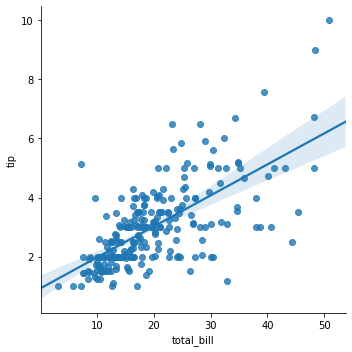

In [5]:
sns.lmplot(data = tips, x = "total_bill", y = "tip");

## Question 1 – Manual Formulation

In [Lecture 14](http://www.ds100.org/fa19/resources/assets/lectures/lec14/14-SimpleLinearRegressionPDF.pdf), we derived the following expression for the line of best fit.

$$\hat{y_i} = \bar{y} + r \frac{SD(y)}{SD(x)} (x_i - \bar{x})$$

where $\bar{x}$, $\bar{y}$, $SD(x)$, $SD(y)$ correspond to the means and standard deviations of $x$ and $y$, respectively, and $r$ is the correlation coefficient.

### Question 1a

Assign `xbar`, `ybar`, `stdx`, `stdy`, and `r`, such that they align with our dataset.

- Hint: Remember, in our case, `y` is `tip`, and `x` is `total_bill`.
- Hint: You may find `np.corrcoef` handy in computing `r`. Note that the output of `np.corrcoef` is a matrix, not a number, so you'll need to collect the correlation coefficient by indexing into the returned array. 

<!--
BEGIN QUESTION
name: q1a
-->

In [6]:
xbar = np.mean(tips['total_bill'])
ybar = np.mean(tips['tip'])
stdx = np.std(tips['total_bill'])
stdy = np.std(tips['tip'])
r = np.corrcoef([tips['total_bill'],tips['tip']])[1][0]

In [7]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1b

Now, set `b_hat` and `a_hat` correctly, in terms of the variables you defined above. 

- Hint: Try and match the slope and intercept in $\hat{y_i} = \hat{a} + \hat{b}x_i$ to the slope and intercept in $\hat{y_i} = \bar{y} + r \frac{SD(y)}{SD(x)} (x_i - \bar{x})$.

- Hint: You may want to define `a_hat` in terms of `b_hat`.

<!--
BEGIN QUESTION
name: q1b
-->

In [8]:
b_hat = r*(stdy/stdx)
a_hat = ybar-b_hat*xbar

In [9]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1c

Now, use `a_hat` and `b_hat` to predict the tip for a total bill amount of \$20. Store your result in `predicted_20`.

<!--
BEGIN QUESTION
name: q1c
-->

In [10]:
predicted_20 = a_hat+b_hat*20
predicted_20

3.0207599612417404

In [11]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1d
Assign `regression` to be a `pd.Series` of predicted $y$ values (i.e., predicted `"tip"` values) for the observed total bills (`tips["total_bill"]`). You will need to use `a_hat`, `b_hat`, and `tips["total_bill"]`.

<!--
BEGIN QUESTION
name: q1d
-->

In [12]:
regression = pd.Series([a_hat+b_hat*x for x in tips["total_bill"]])

In [13]:
ok.grade("q1d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



If you defined `regression` correctly, the following cell will generate a scatter plot of `tip` vs. `total_bill`, along with the line of best fit you just computed.

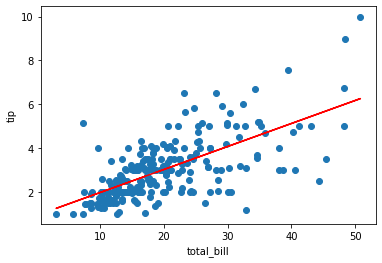

In [14]:
plt.scatter(tips["total_bill"], tips["tip"]);
plt.plot(tips["total_bill"], regression, color = 'r');
plt.xlabel('total_bill');
plt.ylabel('tip');

### Question 1e

Consider $r$, the correlation coefficient between `tips` and `total_bill`.

In [15]:
r

0.6757341092113641


**In the cell below**, comment on the value of $r$, and what it means in the context of the above scatter plot.

the value of r is .675, which is closer to 1 than to 0. This tells us the variables total_bill and tip are more 'connected' than not. r is additionally positive, indicating that the larger the total_bill is, the higher the tip is predicted to be.

## Question 2 – Using Scipy Minimize

`scipy.minimize` is a powerful method that can determine the optimal value of a variety of different functions. In practice, it is used to minimize functions that have no (or difficult to obtain) analytical solutions (it is a **numerical method**).

It is overkill for our simple example, but nonetheless, we will show you how to use it, as it will become useful in the near future.

### Question 2a

Firstly, fill out the definition of `l2_tip_loss` so that it computes the empirical risk for a given choice of `a` and `b`. That is, it computes

$$\frac{1}{n} \sum_{i = 1}^n(y_i - (a - b x_i))^2$$

where, again, $x$ and $y$ refer to `"total_bill"` and `"tip"`.

<!--
BEGIN QUESTION
name: q2a
-->

In [16]:
def l2_tip_loss(a, b):
    """Returns average l2 loss between regression line for intercept a 
       and slope b"""
    return 1.0/len(tips['tip'])*np.sum((tips['tip']-(a+b*tips['total_bill']))**2)

In [17]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Try out different `a` and `b` values. Observe that if you pick values close to the ones from the earlier part of this lab then the loss is lower. 

In [18]:
l2_tip_loss(.4, 0.1)

1.4220208319672132

The `minimize` function we saw in Lab 3 can also minimize functions of multiple variables. There's one quirk, however, which is that the function has to accept its parameters as a single list.

For example, consider the multivariate $f(u, v) = u^2 - 2 u v - 3 v + 2 v^2$. It turns out this function's minimum is at $(1.5, 1.5)$. To minimize this function, we create `f`.

In [19]:
def f(theta):
    u = theta[0]
    v = theta[1]
    return u**2 - 2 * u * v - 3 * v + 2 * v**2

In [20]:
from scipy.optimize import minimize
minimize(f, x0 = [0.0, 0.0]) 

# As an aside: x0 is the "initial guess" for the optimal theta. minimize works iteratively.
# We will study an iterative algorithm for function minimization in the coming weeks.

      fun: -2.2499999999999982
 hess_inv: array([[0.99999999, 0.5       ],
       [0.5       , 0.5       ]])
      jac: array([-5.96046448e-08,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([1.49999995, 1.49999997])

### Question 2b

Define `l2_tip_loss_list` which is exactly like `l2_tip_loss` except that it takes in a single list of 2 variables rather than two separate variables. For example `l2_tip_loss_list([2, 3])` should return the same value as `l2_tip_loss(2, 3)`.

<!--
BEGIN QUESTION
name: q2b
-->

In [21]:
def l2_tip_loss_list(theta):
    a=theta[0]
    b=theta[1]
    """Returns average l2 loss between regression line for intercept a 
       and slope b"""
    return 1/len(tips['tip'])*np.sum((tips['tip']-(a+b*tips['total_bill']))**2)

In [22]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2c

Now, set `minimized` to the result of calling `minimize` to optimize this loss function.

- Hint: Make sure to set `x0`.

<!--
BEGIN QUESTION
name: q2c
-->

In [23]:
minimized = minimize(l2_tip_loss_list, x0 = [0.0,0.0])

Let's look at the output of your call to `minimize`.

In [24]:
minimized

      fun: 1.0360194420115871
 hess_inv: array([[ 2.98000083, -0.12534155],
       [-0.12534155,  0.00633488]])
      jac: array([7.45058060e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.92027066, 0.10502447])

The following cell will print out the values of `a_hat` and `b_hat` computed from both methods ("manual" refers to the technique in Question 1). If you've done everything correctly, these should be very close to one another.

In [25]:
print('a_hat_scipy: ', minimized['x'][0])
print('a_hat_manual: ', a_hat)
print('\n')
print('b_hat_scipy: ', minimized['x'][1])
print('b_hat_manual: ', b_hat)

a_hat_scipy:  0.9202706617668626
a_hat_manual:  0.9202696135546735


b_hat_scipy:  0.10502446590151857
b_hat_manual:  0.10502451738435335


The reason these don't match past the first 5 decimal places is due to the fact that `scipy.minimize` is a numerical method, meaning it approximates the optimal value using some sort of non-algebraic procedure. For our purposes, though, these values are essentially the same.

## Question 3 – Using Scikit Learn

Yet another way to fit a linear regression model is to use scikit learn, an industry standard package for machine learning applications. 

To do so, we first create a `LinearRegression` object.

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Here, `model` is like a "blank slate" for a linear model. Now, we need to tell `model` to "fit" itself to the data. Essentially, this is doing exactly what you did in the previous part of this lab (creating a loss function and finding the parameters that minimize that loss).

<i>Note: `X` needs to be a matrix (or DataFrame), as opposed to a single array (or Series). This is because `sklearn.linear_model` is robust enough to be used for multiple regression, which we will look at in Question 4.</i>

In [27]:
model.fit(X = tips[['total_bill']], y= tips['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the model exists, we can look at the a_hat and b_hat values it found, which are given in the attributes `intercept` and `coef`, respectively.

In [28]:
model.coef_

array([0.10502452])

In [29]:
model.intercept_

0.9202696135546731

To use the `scikit-learn` linear regression model to make predictions, you can use the `model.predict` method:

In [30]:
model.predict(20)

array([3.02075996])

The above line of code tells us that `model` predicts a tip of \$3.02 given a total bill amount of \$20. This is the same as doing `a_hat + b_hat * 20` as in Question 1c.

### Question 3a

Create a linear regression plot using `model.predict`. It should look very similar (if not the same) as your plot from Question 1d.

<!--
BEGIN QUESTION
name: q3a
-->

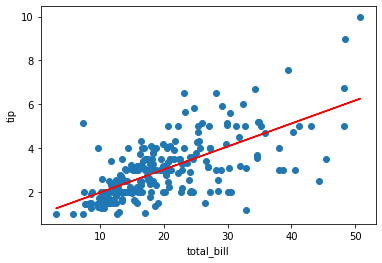

In [31]:
regression.skl = pd.Series([model.predict(x) for x in tips["total_bill"]])
plt.scatter(tips["total_bill"], tips["tip"]);
plt.plot(tips["total_bill"], regression.skl, color = 'r');
plt.xlabel('total_bill');
plt.ylabel('tip');

## Question 4 – Multiple Linear Regression

In the previous parts we showed how to establish relationships between one independent explanatory variable and one response variable. However, with real-world problems you will often want to use **multiple features** to model and predict a response variable. To do so, we will use multiple linear regression, as discussed in [Lecture 15](http://www.ds100.org/fa19/resources/assets/lectures/lec15/15-MultipleRegressionGeometric.pdf). Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to the observed data. Formally, the model for multiple linear regression, given $p$ features is:

$$y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + … + \beta_p x_p $$

Please note that we have been using the terms **features**, **independent variables**, and **explanatory variables** interchangeably. Usually “features” are used in the context of machine learning when you are trying to make predictions. “Independent variables” and “explanatory variables” are mainly found in statistics, econometrics and other related fields which focus on understanding the relationship between a set of variables.  


For example, consider the plot below which shows fuel efficiency vs. engine power for several models of automobile.

In [32]:
# Here, we load the fuel dataset, and drop any rows that have missing data
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data = vehicle_data.sort_values('horsepower', ascending=True)
vehicle_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


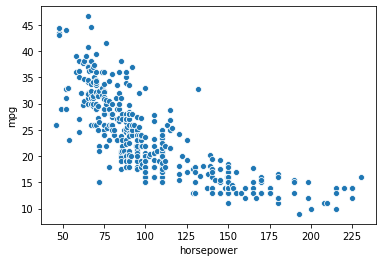

In [33]:
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data);

If we use `horsepower` alone to predict `mpg`, we get not-so-great results.

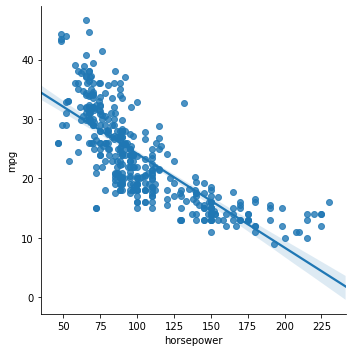

In [34]:
sns.lmplot(x='horsepower', y='mpg', data=vehicle_data);

In lecture, we discussed including functions of existing features as new features. For example, the line below adds a column which contains the square of the horsepower for each car in the dataset.

In [35]:
vehicle_data['hp^2'] = vehicle_data['horsepower'] ** 2
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp^2
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,2116.0
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,2116.0
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),2304.0
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),2304.0
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,2304.0


### Question 4a

Using scikit learn's `LinearRegression`, create and fit a model that tries to predict `mpg` from `horsepower` AND `hp^2`. Name your model `model_multiple`.

- Hint: We do something very similar in Question 3.

<!--
BEGIN QUESTION
name: q4a
-->

In [36]:
model_multiple = LinearRegression()
model_multiple.fit(X = vehicle_data[['horsepower','hp^2']], y= vehicle_data['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
ok.grade("q4a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



After fitting, we can see the coefficients and intercept. Note, there are now two elements in `model_multiple.coef_`, since there are two features.

In [38]:
model_multiple.coef_

array([-0.46618963,  0.00123054])

In [39]:
model_multiple.intercept_

56.90009970211295

### Question 4b

Using the above values, in LaTeX, write out the function that the model is using to predict `mpg` from `horsepower` and `hp^2`.

$mpg = 56.90009970211295 - 0.46618963x_{horsepower} + 0.00123054x_{hp^2} $

The plot below shows the prediction of our model. It's much better!

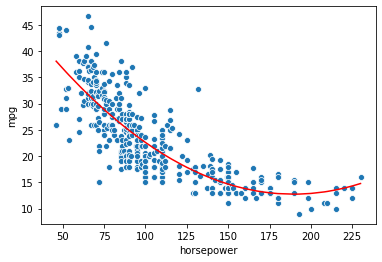

In [40]:
# DO NOT CHANGE THIS CELL
predicted_mpg = model_multiple.predict(vehicle_data[['horsepower', 'hp^2']])
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg, color = 'r');

### Question 4c

In the cell below, explain why we use the term "linear" to describe the model above, even though it incorporates horsepower squared as a feature.

This is because while the values of hp^2 have been squared, the resulting values are placed in a linear combination with the intercept of the model and the original horsepower variable. That is to say, degree of the regression function is still 1.

To see exactly how much better our new model is, we can compare the Multiple $R^2$ from these two fits.  As described in lecture 15,

$$R^2 = \frac{\text{Explained SS}}{\text{Total SS}}$$

Recall, the "explained" sum of squares (SS) is $\sum(\hat{y}_i - \bar{y})^2$ and the "total" sum of squares is $\sum(y_i -  \bar{y})^2$, so we can
compute $R^2$ from the ratio of variances:

$$R^2 =  \frac{\textrm{Var}( \hat{y} \:\:)}  {\textrm{Var}({y})}$$

Unlike $r$, the correlation coefficient we looked at in Question 1, $R^2$  can be used
in the multiple regression setting.  In simple regression, $r^{2}$ and Multiple $R^{2}$ are
the same.

In [41]:
predicted_mpg_horsepower_only = (
    LinearRegression()
    .fit(X = vehicle_data[['horsepower']], y = vehicle_data['mpg'])
    .predict(vehicle_data[['horsepower']])
)

r2_horsepower_only = np.var(predicted_mpg_horsepower_only) / np.var(vehicle_data['mpg'])
r2_both = np.var(predicted_mpg) / np.var(vehicle_data['mpg'])

print('Multiple R^2 using only horsepower: ', r2_horsepower_only)
print('Multiple R^2 using both horsepower and horsepower squared: ', r2_both)

Multiple R^2 using only horsepower:  0.6059482578894348
Multiple R^2 using both horsepower and horsepower squared:  0.6875590305127517


By introducing `hp^2` as a feature, our multiple $R^2$ value increased. What does this mean about the strength of our refined model?

### Question 4d

Let's take this one step further, and introduce a few more features.

Again, using scikit learn's `LinearRegression`, create and fit a model that tries to predict `mpg` using each of the following as features:
- `horsepower`
- `hp^2`
- `model_year`
- `acceleration`

Call your model `model_many`.

<!--
BEGIN QUESTION
name: q4d
-->

In [42]:
desired_columns = ['horsepower','hp^2','model_year','acceleration']
model_many = LinearRegression()
model_many.fit(X = vehicle_data[desired_columns], y= vehicle_data['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
ok.grade("q4d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The plot below shows the prediction of our more sophisticated model.

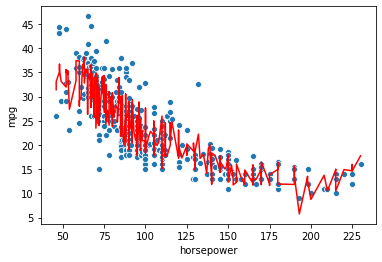

In [44]:
predicted_mpg_many = model_many.predict(vehicle_data[['horsepower', 'hp^2', 'model_year', 'acceleration']])
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg_many, color = 'r');

Think about what you see in the above plot. Why is the shape of our prediction curve so jagged? Do you think this is a good model to predict the `mpg` of some car we don't already have information on?

This idea – the **bias-variance tradeoff** – is an idea we will explore in the coming weeks.

### Question 4e

Lastly, set `r2_many` to be the multiple $R^2$ coefficient obtained by using `model_many`.

- Hint: This is very similar to what we did right before Question 4d. Use `predicted_mpg_many`.
- Note: The above plotting cell needs to have been run in order for this to work.

<!--
BEGIN QUESTION
name: q4e
-->

In [45]:
r2_many = np.var(predicted_mpg_many) / np.var(vehicle_data['mpg'])

In [46]:
ok.grade("q4e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [47]:
print('Multiple R^2 using only horsepower: ', r2_horsepower_only)
print('Multiple R^2 using both horsepower and horsepower squared: ', r2_both)
print('Multiple R^2 using horsepower, horsepower squared, model year, and acceleration: ', r2_many)

Multiple R^2 using only horsepower:  0.6059482578894348
Multiple R^2 using both horsepower and horsepower squared:  0.6875590305127517
Multiple R^2 using horsepower, horsepower squared, model year, and acceleration:  0.8163086433998623


If everything was done correctly, the multiple $R^2$ of our latest model should be substantially higher than that of the previous two models. Think about why this is the case!

**Congrats!** You are finished with this assignment.

# Make sure to complete Vitamin 9 on Gradescope by 11:59 PM on Monday!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>